# Решение краевой задачи методами стрельбы и прогонки

## Метод стрельбы 

## $\frac{d^2y}{dx^2} + p(x)\frac{dy}{dx} + q(x)y = F(x)$

### $\begin{cases}
    \frac{d^2y}{dx^2} = f(x, y, \frac{dy}{dx}) = -p(x)\frac{dy}{dx} - q(x)y + F(x),
    \\
    A_1y(x_0)+A_2y'(x_0)=C_1,
    \\
    B_1y(x_f)+B_2y'(x_f)=C_2
\end{cases}$

### Для реализации метода стрельбы мы переходим от краевой задачи к системе дифференциальных уравнений 1 порядка

### $\begin{cases}
       \begin{cases}
           \frac{dy}{dx}=z,\\
           y(x_{0})=\frac{A-A_2a}{A_1}
       \end{cases}\\
   \begin{cases}
       \frac{dz}{dx}=-p(x)z - q(x)y + F(x),\\
       z(x_{0})=y'(x_{0})=a
   \end{cases}
\end{cases}$

Зададим сразу параметры среды, в том числе точность вычислений $\epsilon$, и некоторые настройки $matplotlib$

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import math
import sympy

#-------------------------------------------------------

plt.style.use('classic')
plt.style.use('dark_background')

#-------------------------------------------------------

eps = 1e-3

### Зададим нашу краевую задачу
### $y''+\frac{1}{(1 + x)}y'+\frac{2}{ch^2(x)}y=\frac{1}{ch^2(x)}\left( \frac{1}{1+x}+2ln(1+x) \right)$ <br/> $\begin{cases}
    y(0)=0,
    \\
    y(1)-y'(1)=0.5348
\end{cases}$

Здесь $p(x)=\frac{1}{1+x}$, $q(x)=\frac{2}{ch^2(x)}$, $F(x)=\frac{1}{ch^2(x)}\left( \frac{1}{1+x}+2ln(1+x) \right):$

In [25]:
def p(x):
    return (1 / (1 + x))

def q(x):
    return (2 / (np.cosh(x))**2)

def F(x):
    return (1 / (np.cosh(x))**2) * (1 / (1 + x) + 2 * np.log(1 + x))

def f(x, y, z):
    return (-1) * p(x) * z - q(x) * y + F(x)

Для данной краевой задачи функция
<b>$y(x) = ln(1+x) + th(x)$</b> является решением.

In [26]:
def solution(x):
    return (np.log(1 + x) + np.tanh(x))

Граничные условия имеют вид<br/>
$\begin{cases}
    y(0)=1,
    \\
    y(1)-2y'(1)=0.1704
\end{cases}$

Здесь<br/>
$x_0=0,$<br/>$x_f=1$

In [27]:
x_0 = 0
x_f = 1

x0 = 0
xf = 1

A_1 = 1
A_2 = 0
A = 0

B_1 = 1
B_2 = -1
#B = 0.5348
B = 0.5347669949016841281421936650212687135710820033874208510041790693

Перейдём от краевой задачи к системе двух уравнений

$\begin{cases}
       \begin{cases}
           \frac{dy}{dx}=z,\\
           y(0)=0
       \end{cases}\\
   \begin{cases}
       \frac{dz}{dx}=\frac{1}{ch^2(x)}\left( \frac{1}{1+x}+2ln(1+x) \right)-\frac{1}{1+x}z-\frac{2}{ch^2(x)}y,\\
       z(0)=y'(0)=a
   \end{cases}
\end{cases}$

где $a$ - какое-то неизвестное число, которые мы будет варьировать.

Напишем метод Ньютона/дихотомии для нахождения корня уравнения $f(x)=0$

In [28]:
def Newton_Method(F, dF, x0, eps = 1e-3):
    """
    Ищет решение f(x)=0 методом Ньютона
    
    F - функция от x, для которой ищем решение
    dF - производная по x от F
    x0 - начальная точка
    eps - погрешность
    
    returns:
    x, для которого abs(f(x)) < eps
    """
    
    while True:
        delta = abs(F(x0))
        print(delta)
        print(eps)
        if delta < eps:
            return x0
        x0 = x0 - F(x0)/dF(x0)
        
def Dichotomy(Func, a, b, eps=1e-6):
    """
    Ищет решение f(x)=0 методом Ньютона
    
    F - функция от x, для которой ищем решение
    a - левая граница отрезка
    b - правая граница отрезка
    eps - погрешность
    
    returns:
    x, для которого abs(f(x)) < eps
    """
    
    if Func(a) == 0:
        return a
    elif Func(b) == 0:
        return b
    else:
        x = (a + b) / 2
        while abs(Func(x)) > eps:
            #print(abs(Func(x)))
            x = (a + b) / 2
            if Func(x)*Func(b) <= 0:
                a = x
            else:
                b = x
        return x

Здесь $f$ — функция, для которой ищем корень, $df$ — её производная, $x_0$ — начальная точка для нахождения корня, $\epsilon$ — точность.

Напишем функцию "выстрела" для нашего метода

In [29]:
def Shooting(x0, x1, A1, A2, A, a, n, function=f):
    h = (x1 - x0) / n
    X = x0
    Y = (A - A2 * a) / A1
    Z = a
    #for i in range(n):
    #    X, Y, Z = X + h, Y + h * Z, Z + h * function(X, Y, Z)
    #    Y = Y + h * Z
    #    Z = Z + h * function(X, Y, Z)  
    for i in range(n):
        q1 = function(X, Y, Z)
        k1 = Z
        
        q2 = function(X + h/2, Y + h * k1 / 2, Z + h * q1 / 2)
        k2 = Z + q1 * h / 2
        
        q3 = function(X + h/2, Y + h * k2 / 2, Z + h * q2 / 2)
        k3 = Z + q2 * h / 2
        
        q4 = function(X + h, Y + h * k3, Z + h * q3)
        k4 = Z + q3 * h
        
        Z += h * (q1 + 2*q2 + 2*q3 + q4) / 6
        Y += h * (k1 + 2*k2 + 2*k3 + k4) / 6
        X += h
    return Y, Z

Здесь $x_0$ — левая граница рассматриваемего отрезка, $x_1$ — правая граница, $y_0$ — значение функции в $x_0$, $a$ — варьируемое значение $y'(x_0)$, $n$ — количество делений отрезка $[x_0, x_1]$, $function$ — функция $f(x, y, z)$.

Далее реализуем сам метод стрельбы для нахождения значения $y'(x_0)$. Для этого будем использовать уже написанную функцию "выстрела" и функцию $dF$ - функцию для численного нахождения значенния производной в точке.

In [30]:
def Shooting_Method(x0, x1, A1, A2, A, B1, B2, B, n, function=f, eps=1e-12):
    """
    Поиск решение ОДУ методом стрельбы

    (x0, y0) - начальная точка
    (x1, y1) - конечная точка    
    function(x, y, z) - f, в выражении если y'' = z = f(x, y, z)
    eps = 1e-6 - погрешность
    
    return:
    Угол стрельбы, y'(x0)
    """
    def Func(ksi):
        Y, Z = Shooting(x_0, x1, A1, A2, A, ksi, n, function)
        #print("y(1):\t\t", Y)
        #print("y'(1):\t\t", Z)
        #print("y(1)-y'(1):\t", Y - Z)
        #print()
        return B1 * Y + B2 * Z - B
    
    h1 = 1e-3
    
    a1 = 1
    a2 = a1 + h1
    
    y1, z1 = Shooting(x_0, x1, A1, A2, A, a1, n, function)
    y2, z2 = Shooting(x_0, x1, A1, A2, A, a2, n, function)
    
    while (Func(a1) * Func(a2)) > 0:
        a1, a2 = a2, a2 + h1
        y1, z1 = Shooting(x_0, x1, A1, A2, A, a1, n, function)
        y2, z2 = Shooting(x_0, x1, A1, A2, A, a2, n, function)
    
    def dF(ksi):
        return (Func(ksi+eps) - Func(ksi-eps)) / (2*eps)
    
    return Dichotomy(Func, a1, a2)

$x_0$ — левая граница рассматриваемего отрезка, $x_1$ — правая граница, $y_0$ — значение функции в $x_0$, $y_1$ — значение функции в $x_1$, $function$ — функция $f(x, y, y')$, $\epsilon$ — допустимая погрешность.

Для визуализации полученного решения напишем функцию, которая будет рисовать соответствующие графики полученного и оригинального решения краевой задачи.

In [31]:
def Solve_Eq(x0, x1, y0, y_prime0, n, function=f):
    h = (x1 - x0) / (n)
    
    X = np.linspace(x0, x1, n + 1)
    sx = x0
    Y = []
    sy = y0
    Y.append(y0)
    Z = []
    sz = y_prime0
    Z.append(y_prime0)
    
    for i in range(n):
        q1 = function(sx, sy, sz)
        k1 = sz
        
        q2 = function(sx + h/2, sy + h * k1 / 2, sz + h * q1 / 2)
        k2 = sz + q1 * h / 2
        
        q3 = function(sx + h/2, sy + h * k2 / 2, sz + h * q2 / 2)
        k3 = sz + q2 * h / 2
        
        q4 = function(sx + h, sy + h * k3, sz + h * q3)
        k4 = sz + q3 * h
        
        sz += h * (q1 + 2*q2 + 2*q3 + q4) / 6
        sy += h * (k1 + 2*k2 + 2*k3 + k4) / 6
        sx += h
        
        Y.append(sy)
        Z.append(sz)
        
    return Y

Полученное значение начального наклона: 1.99999804687489

y(1): 		1.4547413365157102
y'(1): 		0.9199743416140261
y(1)-y'(1): 	0.5347669949016841


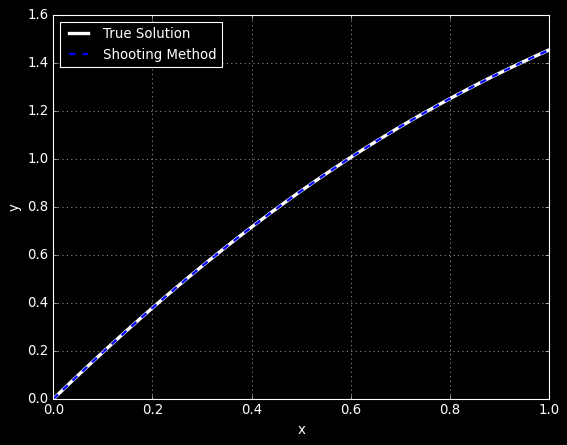

In [33]:
def Plot_Solutions(x0, x1, y0, y_prime, n, function=f):
    
    X = np.linspace(x0, x1, n + 1)
    Y = Solve_Eq(x0, x1, y0, y_prime, n, function)
        
#     for i in range(n): 
#        #sx = sx + h
#        sx, sy, sz = sx + h, sy + h * sz, sz + h * function(sx, sy, sz)
#        #sy = sy + h * sz
#        Y.append(sy)
#        #sz = sz + h * function(sx, sy, sz)
#        Z.append(sz)
    
    SOL = [solution(i) for i in np.linspace(x0, x1, 1000)]  # Массив точных значений решения краевой задачи 
    
    plt.plot(np.linspace(x0, x1, 1000), SOL, linewidth=3, color="white", linestyle="-", label="True Solution")  # Строим оригинальное решение
    plt.plot(X, Y, linewidth=2, color="blue", linestyle="--", label="Shooting Method")                     # Строим полученное нами решение
    
    
    plt.grid(True)
    plt.legend(loc="upper left", fontsize=12)
    plt.xlabel("x")
    plt.ylabel("y")
    
    return
    
n = 20
y_prime_0 = Shooting_Method(x_0, x_f, A_1, A_2, A, B_1, B_2, B, n, f)  # Находим значение угла, при котором наш выстрел будет успешным
print("Полученное значение начального наклона:", y_prime_0)

print("\ny(1): \t\t1.4547413365157102")
print("y'(1): \t\t0.9199743416140261")
print("y(1)-y'(1): \t0.5347669949016841")

y_0 = (A - A_2 * y_prime_0) / A_1

Plot_Solutions(x_0, x_f, y_0, y_prime_0, n, f)  # Строим графики решений

In [12]:
# def max_error_SM(trueY, calcY):
#     errY = [abs(trueY[i] - calcY[i]) for i in range(len(calcY))]
#     return max(errY)

# def log_graph_SM(x0, xf, y0, yprime0, function=f):
#     errY = []
#     hY = []
#     for n in range(10, 1000, 10):
#         X = np.linspace(x0, xf, n+1)
#         SOL = [solution(i) for i in X]
#         Y = Solve_Eq(x0, xf, y0, yprime0, n, function)
#         hY.append(np.log((xf - x0) / n))
#         errY.append(np.log(max_error_SM(SOL, Y)))
#     return errY, hY
        
# errY, hY = log_graph_SM(x_0, x_f, y_0, y_prime_0)
# plt.plot(hY, errY)
# plt.grid(True)

## Метод прогонки (алгоритм трёхдиагональной матрицы)

### $ \begin{cases}
    y''+p(x)y'+q(x)y=f(x)\\
    A_1y(a)+B_1y'(a)=C_1\\
    A_2y(b)+B_2y'(b)=C_2
    \end{cases} $

### Наша задача имеет следующий вид:

### $ \begin{cases}
y''+\frac{1}{1+x}y'+\frac{2}{ch^2(x)}y=\frac{1}{ch^2(x)}\left( \frac{1}{1+x}+2ln(1+x) \right)\\
y(0)=0\\
y(1)-y'(1)=0.5348
\end{cases} $

#### Решением этой задачи является функция 

$ y(x) = ln(1+x)+th(x)$

Зададим сразу все имеющиеся у нас параметры и функции:

In [36]:
def p(x):
    return (1 / (1 + x))

def q(x):
    return (2 / (np.cosh(x))**2)

def f(x):
    return (1 / (np.cosh(x))**2) * (1 / (1 + x) + 2 * np.log(1 + x))

def solution(x):
    return (np.log(1 + x) + np.tanh(x))

A1 = 1
B1 = 0
C1 = 0

A2 = 1
B2 = -1
#C2 = 0.5348
C2 = 0.534766994901684    # Более точное значение нужно для более точного построения графиков ошибки

x0 = 0
xf = 1

### Для реализации метода прогнки будем пользоваться разностной апроксимацией производных

Первую производную функции $y(x)$ в точке $x_i$ можно записать через значения функции в $i-1$ и $i+1$ точках:

$y'(x_i)=\frac{y_{i+1}-y_{i-1}}{2h}$

Вторую производную, соответственно:

$y''(x_i)=\frac{y_{i+1}-2y_i+y_{i-1}}{h^2}$

В таком случае, используя равномерную сетку $h = \frac{x_f - x_0}{n}$, $y(x_i)=y_i$, $p(x_i)=p_i, q(x_i)=q_i, f(x_i)=f_i$, получим:

$ \begin{cases}
A_1y_0+B_1\frac{y_1-y_0}{h}=C_1 \\
\frac{y_{k+1}-2y_k+y_{k-1}}{h^2}+p_k\frac{y_{k+1}-y_{k-1}}{2h}+q_ky_k=f_k \\
A_2y_n+B_2\frac{y_{n-1}-y_n}{h}=C_2
\end{cases}$

$A_1y_0+B_1\frac{y_1-y_{-1}}{2h}=C_1$

$\frac{y_1-2y_0+y_{-1}}{h^2}+p_0\frac{y_1-y_{-1}}{2h}+q_0y_0=f_0$

Из первого:

$\frac{y_1-y_{-1}}{2h}=\frac{C_1 - A_1y_1}{B_1}$

$y_{-1}=y_1 - 2h\frac{C_1 - A_1y_0}{B_1}$

Подставим во второе:

$2y_1-2y_0-\frac{hA_1}{B_1}y_0-\frac{h^2A_1}{B_1}y_0+h^2q_0y_0=f_0h^2-p_0\frac{h^2C_1}{B_1}+2\frac{hC_1}{B_1}$

Переобозначаем коэффициенты:

$\begin{cases}
b_0y_0+c_0y_1=d_0 \\
a_ky_{k-1}+b_ky_k+c_ky_{k+1}=d_k \\
a_ny_{n-1}+b_ny_n=d_n
\end{cases}$

$\begin{cases}
a_0=0\\
b_0=-hB_1+h^2A_1\\
c_0=hB_1\\
d_0=C_1\\
a_k=1-\frac{hp_k}{2}\\
b_k=-2+h^2q_k\\
c_k=1+\frac{hp_k}{2}\\
d_k=f_k\\
a_n=hB_2\\
b_n=-hB_2+h^2A_2\\
c_n=0\\
d_n=C_2
\end{cases}$

Составим матрицу из полученных равенств:

$\begin{pmatrix}
b_0 & c_0 & & & \\
a_1 & b_1 & c_1 & & \\
& a_2 & \ddots & \ddots & \\
& & \ddots & \ddots & c_{n_1} \\
& & & a_n & b_n \\
\end{pmatrix}$
$\begin{pmatrix}
y_0 \\
y_1 \\
y_2 \\
\dots \\
y_n
\end{pmatrix}$
$=$
$\begin{pmatrix}
d_0 \\
d_1 \\
d_2 \\
\dots \\
d_n
\end{pmatrix}$

In [37]:
n = 21
h = 1 / (n - 1)
X = np.linspace(x0, xf, n)
#print(X)

P = [p(i) for i in X]
Q = [q(i) for i in X]
F = [f(i) for i in X]

A = []
A.append(0)
B = []
B.append(A1)
C = []
C.append(0)
D = []
D.append(C1)

for i in range(1, n - 1):
    A.append(1 - h * P[i] / 2)
    B.append(-2 + Q[i]*h*h)
    C.append(1 + h * P[i] / 2)
    D.append(F[i]*h*h)

A.append(2)
B.append(-2 - 2 * h * A2 / B2 - P[-1] * A2 * h*h / B2 + Q[-1] * h*h)
C.append(0)
D.append(F[-1] * h*h - h*h * P[-1] * C2 / B2 - 2 * h * C2 / B2)

Matrix=[[0 for i in range(n)] for _ in range(n)]
#print(Matrix)

for i in range(n):
    if i == 0:
        Matrix[i][i] = B[i]
        Matrix[i][i+1] = C[i]
    elif i == n - 1:
        Matrix[i][i] = B[i]
        Matrix[i][i-1] = A[i]
    else:
        Matrix[i][i] = B[i]
        Matrix[i][i-1] = A[i]
        Matrix[i][i+1] = C[i]

# print("i \ j\t", end='')
# for k in range(n):
#     print(f'   {k}  ', end="")
# print("\t      D")
for i in range(n):
    #print(f"{i}", "\t", end="")
    for j in range(n):
        if i == j or i == j + 1 or i == j - 1:
            print("\033[34m{}".format(f'{Matrix[i][j]: .3f}'), end="")
        else:
            print("\033[30m{}".format(f'{Matrix[i][j]: .3f}'), end="")
    print()
    #print("\t", "\033[30m{}".format(f'{D[i]: .6f}'))
#print(np.linalg.cond(Matrix))

 1.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 0.976-1.995 1.024 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 0.000 0.977-1.995 1.023 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 0.000 0.000 0.978-1.995 1.022 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 0.000 0.000 0.000 0.979-1.995 1.021 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 0.000 0.000 0.000 0.000 0.980-1.995 1.020 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 0.000 0.000 0.000 0.000 0.000 0.981-1.995 1.019 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000
 0.000 0.000 0.000 0.000 0.000 0.000 0.981-1.996 1.019 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.

Каждое уравнение матрицы имеет вид:

$a_{k+1}y_{k}+b_{k+1}y_{k+1}+c_{k+1}y_{k+2}=d_{k+1}$

$b_0y_0+c_0y_1=d_0$

$y_0=-\frac{c_0}{b_0}y_1+\frac{d_0}{b_0}$

Подставим во второе уравнение:

$a_1y_0+b_1y_1+c_1y_2=d_1$

$a_1\left(-\frac{c_0}{b_0}y_1+\frac{d_0}{b_0}\right)+b_1y_1+c_1y_2=d_1$

$\left(b_1-\frac{a_1c_0}{b_0}\right)y_1+c_1y_2=\left( d_1-\frac{a_1d_0}{b_0} \right)$

$\left( b_1+a_1A_0 \right)y_1+c_1y_2=\left( d_1-a_1B_0 \right)$<br/><br/>

$A_0=-\frac{c_0}{b_0}$<br/> $B_0=\frac{d_0}{b_0}$

$\left( b_1 + a_1A_0 \right)y_1=\left(d_1-a_1B_0 \right)-c_1y_2$

$y_1=\frac{d_1-a_1B_0}{b_1 + a_1A_0}-\frac{c_1}{b_1 + a_1A_0}y_2$

$y_1=B_1+A_1y_2$<br/><br/>

$A_1=-\frac{c_1}{b_1 + a_1A_0}$

$B_1=\frac{d_1-a_1B_0}{b_1 + a_1A_0}$

Обобщая эту формулу на все точки, получаем:

$y_i=B_i+A_iy_{i+1}$<br/><br/>

$A_i=-\frac{c_i}{b_i + a_iA_{i-1}}$

$B_i=\frac{d_i-a_iB_{i-1}}{b_i + a_iA_{i-1}}$

При этом, для $y_n$ мы получим, что $A_n = 0$ или же $y_n=B_n$

Напишем функцию прямого хода для решения нашей системы уравнений (последовательное исключение переменных):

In [38]:
def forward_path(A, B, C, D, n):
    AA = [-C[0]  / B[0]]
    BB = [D[0] / B[0]]
    for i in range(1, n):
        AA.append(- C[i] / (B[i] + A[i] * AA[i-1]))
        BB.append((D[i] - A[i]*BB[i-1]) / (B[i] + A[i] * AA[i-1]))
    return AA, BB

AA, BB = forward_path(A, B, C, D, n)

Так как мы сделали прямую прогонку нашей матрицы, мы исключили из последнего уравнения все переменные, кроме $y_n$, поэтому мы можем спокойно найти $y_n$:

$y_n=B_n$

Зная значение $y_n$, мы можем вычислить значение $y_{n-1}$, зная значения $b_n$, $c_n$, $d_n$:

$y_{n-1}=B_{n-1}+A_{n-1}y_n$

Напишем функцию обратного хода:

In [39]:
def backward_path(AA, BB, n):
    Y = []
    Y.append(BB[n-1])
    for i in range(n - 2, -1, -1):
        Y.append(BB[i] + AA[i] * Y[n - i - 2])
    return Y[::-1]

Y = backward_path(AA, BB, n)


In [40]:
trueX = np.linspace(x0, xf, 1000)
trueY = [solution(i) for i in trueX]

print(Y[-1])
print(trueY[-1])

# plt.plot(trueX, trueY, color="aqua", label="Реальное решение")
# plt.plot(X, Y, color="yellow", linestyle="--", label="Метод прогонки порядка 2")
# plt.legend(loc="lower right", fontsize=12)
# plt.grid(True)

1.4549518075569003
1.4547413365157102


In [41]:
def printMatrix(A, B, C, n):
    Matrix=[[0 for i in range(n)] for _ in range(n)]
    #print(Matrix)

    for i in range(n):
        if i == 0:
            Matrix[i][i] = B[i]
            Matrix[i][i+1] = C[i]
        elif i == n - 1:
            Matrix[i][i] = B[i]
            Matrix[i][i-1] = A[i]
        else:
            Matrix[i][i] = B[i]
            Matrix[i][i-1] = A[i]
            Matrix[i][i+1] = C[i]


    for i in range(n):
        for j in range(n):
            if i == j or i == j + 1 or i == j - 1:
                print("\033[34m{}".format(f'{Matrix[i][j]: .3f}'), end="")
            else:
                print("\033[30m{}".format(f'{Matrix[i][j]: .3f}'), end="")
        print()

In [44]:
def TridiagMatrixMethod(a, b, n, A1, B1, C1, A2, B2, C2, p=p, q=q, f=f, order=2):
    h = (b - a) / n
    X = np.linspace(a, b, n + 1)
    P = [p(i) for i in X]
    Q = [q(i) for i in X]
    F = [f(i) for i in X]

    A = []
    A.append(0)
    B = []
    B.append(A1 / (h*h))
    C = []
    C.append(0)
    D = []
    D.append(C1 / (h*h))

    for i in range(1, n):
        A.append(1 / (h*h) - P[i] / (2*h))
        B.append(-2/(h*h) + Q[i])
        C.append(1 / (h*h) + P[i] / (2*h))
        D.append(F[i])
    
    if order==2:
        A.append(2 / (h*h))
        B.append((-2 / (h*h) - 2 * A2 / (B2 * h) - P[n] * A2 / B2 + Q[n]))
        C.append(0)
        D.append((F[n] - P[n] * C2 / B2 - 2 * C2 / (B2 * h)))
    elif order==1:
        A.append(-B2 / h)
        B.append(A2 + B2 / h)
        C.append(0)
        D.append(C2)
    
    # printMatrix(A, B, C, n)
    
    AA, BB = forward_path(A, B, C, D, n + 1)
    Y = backward_path(AA, BB, n + 1)

    return Y

1.4547413365157102
1.4862612112988332
1.4549518075569057


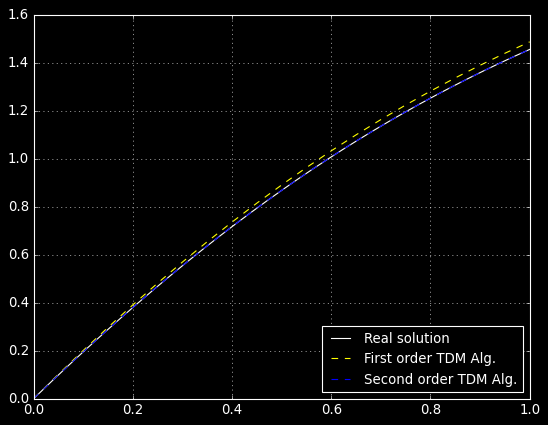

In [45]:
n = 20

trueX = np.linspace(x0, xf, 1000)
trueY = [solution(i) for i in trueX]

X = np.linspace(x0, xf, n + 1)
Y1 = TridiagMatrixMethod(x0, xf, n, A1, B1, C1, A2, B2, C2, order=1)
Y2 = TridiagMatrixMethod(x0, xf, n, A1, B1, C1, A2, B2, C2, order=2)

print(trueY[-1])
print(Y1[-1])
print(Y2[-1])

plt.plot(trueX, trueY, color="white", label="Real solution")
plt.plot(X, Y1, color="yellow", linestyle="--", label="First order TDM Alg.")
plt.plot(X, Y2, color="blue", linestyle="--", label="Second order TDM Alg.")

plt.legend(loc="lower right", fontsize=12)
plt.grid(True)

In [46]:
def max_err(exactArr, calcArr):
    errors = [abs(exactArr[i] - calcArr[i]) for i in range(len(calcArr))]
    return max(errors)

def log_graph(a=x0, b=xf, A1=A1, B1=B1, C1=C1, A2=A2, B2=B2, C2=C2, order=2):
    errArr =[]
    hArr = []
    for n in range(10, 1000, 10):
        calcArr = TridiagMatrixMethod(a, b, n, A1, B1, C1, A2, B2, C2, p, q, f, order)
        exactArr = [solution(i) for i in np.linspace(a, b, n + 1)]
        errArr.append(np.log(max_err(exactArr, calcArr)))
        hArr.append(np.log((b - a) / n))
    return errArr, hArr

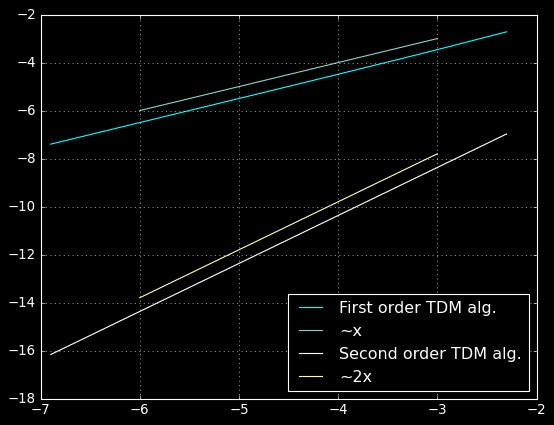

In [47]:
#-------------------------------
xs = np.linspace(-6, -3, 100)
def ff(x):
    return x

def fff(x):
    return 2*x - 1.8
#-------------------------------

errArr, hArr = log_graph(order=1)
plt.plot(hArr, errArr, color="aqua", label="First order TDM alg.")

plt.plot(xs, ff(xs), label="~x")

#-------------------------------

errArr, hArr = log_graph(order=2)
plt.plot(hArr, errArr, color="white", label="Second order TDM alg.")

plt.plot(xs, fff(xs), label="~2x")

plt.legend(loc="lower right")
plt.grid(True)